In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime


In [ ]:
df = pd.read_csv("./market-stat.csv") #loading the csv file
df['DATE'] =  pd.to_datetime(df['DATE'], infer_datetime_format=True)
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month_name()
df['DAY'] = df['DATE'].dt.day_name()
df=df[df.SYMBOL=='NTC']#choosing stock symbol
df['DIFFERENCE_PRICE']= df['CLOSE'] -df['OPEN']


In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


In [ ]:

# Create start and end variables
start= datetime.datetime(2007,8,15)
end = datetime.datetime(2020,3,22)

In [ ]:
df['CLOSE'].max()

In [7]:
df['CLOSE'].pct_change()

1            NaN
3      -0.020867
5      -0.008197
7       0.006612
9       0.018062
          ...   
5193   -0.090572
5195   -0.071837
5197   -0.090589
5199   -0.090909
5201   -0.042553
Name: CLOSE, Length: 2640, dtype: float64

In [ ]:
df=df.set_index('DATE')

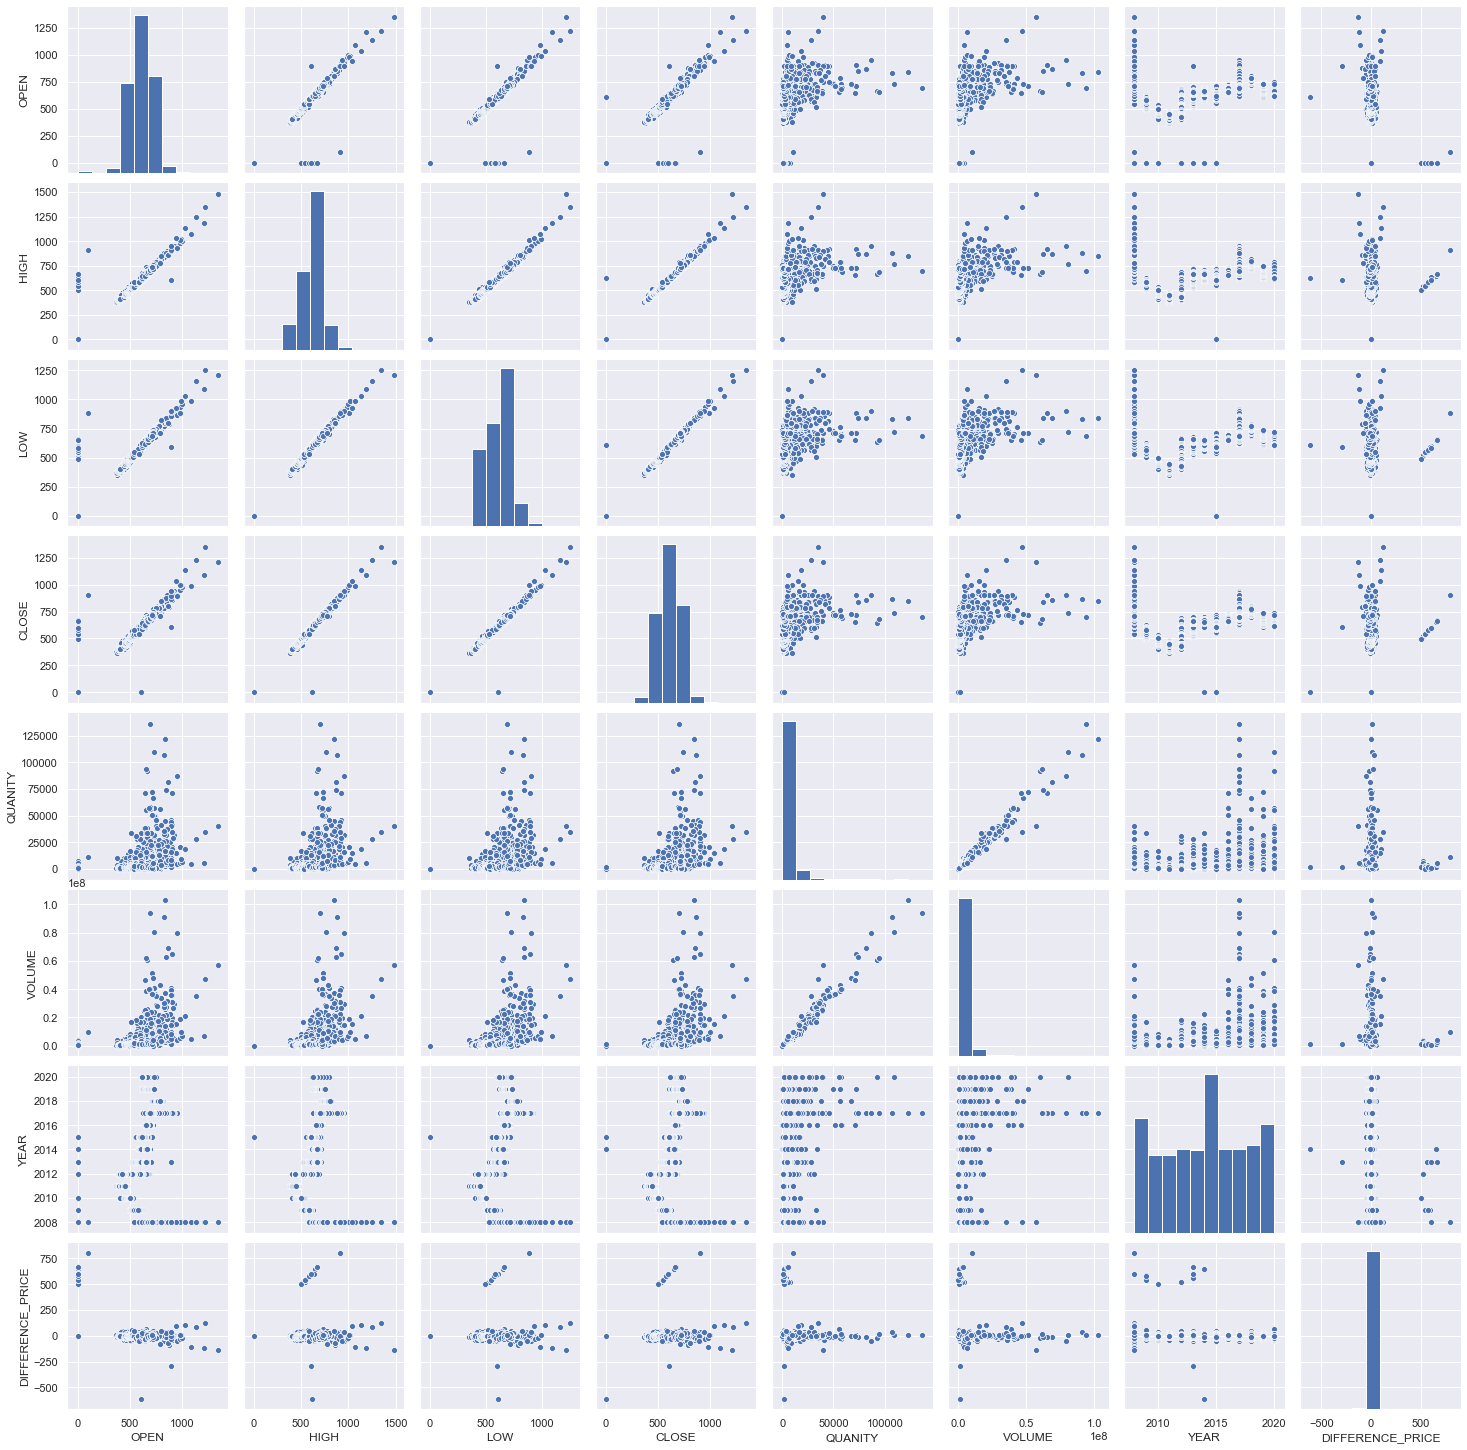

In [14]:
import seaborn as sns
sns.pairplot(df[1:])

In [11]:

# Worst single day returns
df['CLOSE'].min()

0.0

In [29]:
df['CLOSE'].max()

1347.0

In [30]:
# Calucate standard deviations
df.std()

OPEN       1.241667e+02
HIGH       1.165216e+02
LOW        1.120595e+02
CLOSE      1.145768e+02
QUANITY    8.985774e+03
VOLUME     6.940992e+06
YEAR       3.398605e+00
dtype: float64

In [31]:
df['CLOSE'].std()

114.57680844867987

In [7]:
df.head()

,SYMBOL,OPEN,HIGH,LOW,CLOSE,QUANITY,VOLUME,YEAR,MONTH,DAY,DIFFERENCE_PRICE
DATE,,,,,,,,,,,
2020-03-22,NTC,622.0,632.0,610.0,623.0,275,168765,2020,March,Sunday,1.0
2020-03-19,NTC,605.0,617.0,600.0,610.0,33369,20166504,2020,March,Thursday,5.0
2020-03-18,NTC,615.0,615.0,600.0,605.0,16277,9847086,2020,March,Wednesday,-10.0
2020-03-17,NTC,632.0,632.0,607.0,609.0,27730,16901593,2020,March,Tuesday,-23.0
2020-03-16,NTC,625.0,626.0,610.0,620.0,14334,8859338,2020,March,Monday,-5.0


In [33]:
df.loc[df.index >= '2015-01-01'].std()

OPEN       6.235877e+01
HIGH       6.359348e+01
LOW        6.101939e+01
CLOSE      6.211115e+01
QUANITY    1.208908e+04
VOLUME     9.275523e+06
YEAR       1.505432e+00
dtype: float64

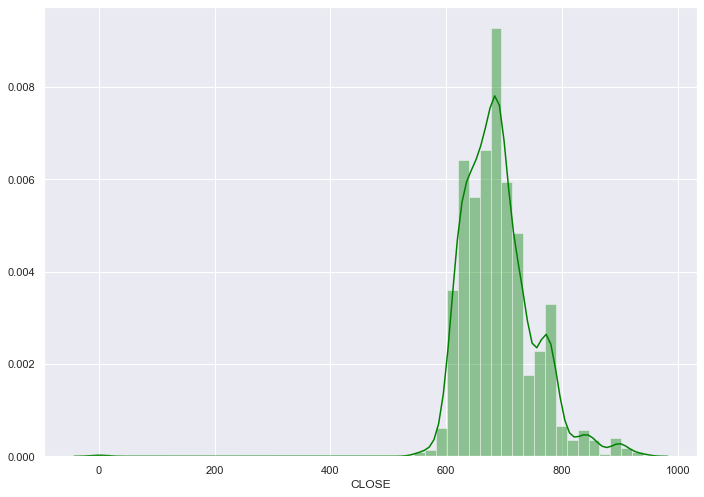

In [34]:
sns.distplot(df.loc[df.index >= '2015-01-01']['CLOSE'], color = 'green', bins =50)

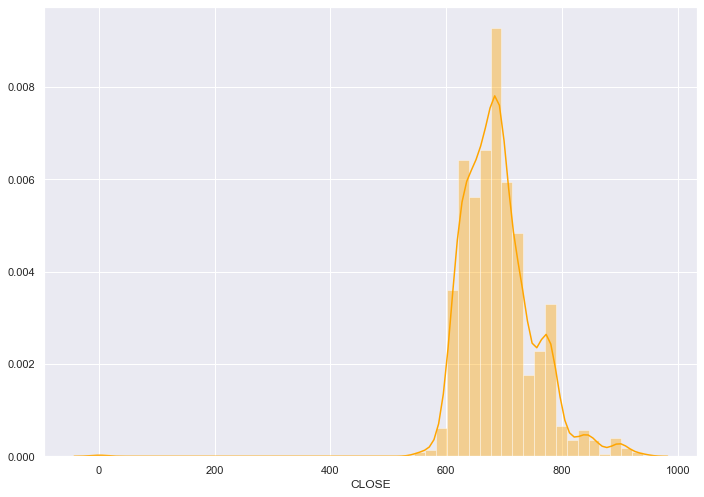

In [35]:
sns.distplot(df.loc[df.index >= '2015-01-01']['CLOSE'], color = 'orange', bins = 50)


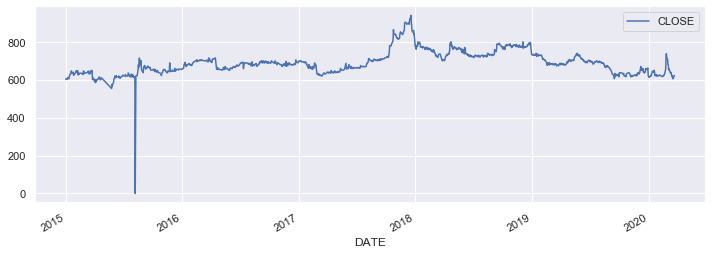

In [36]:
df.loc[df.index >= '2015-01-01']['CLOSE'].plot(label = 'CLOSE', figsize = (12,4))
plt.legend()

Text(0.5, 1.0, 'Moving Average v Actual Closing Price')

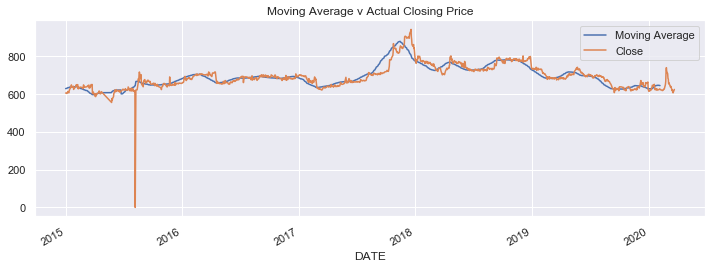

In [37]:
plt.figure(figsize =(12,4))
df.loc[df.index >= '2015-01-01']['CLOSE'].rolling(window = 30).mean().plot(label = 'Moving Average' )
df.loc[df.index >= '2015-01-01']['CLOSE'].plot(label = 'Close')
plt.legend()
plt.title('Moving Average v Actual Closing Price')